At time 0, an urn contains 1 black ball and 1 white ball. At each time $1, 2, 3, . . . ,$ a ball is chosen at random from the urn and is replaced together with a new ball of the same color. Just after time $n$, there are therefore $n + 2$ balls in the urn, of which $B_n + 1$ are black, where Bn is the number of black balls chose by time $n$.

Simulate this model with a computer until the number of balls in the urn is $1000$. Do this simulation at least $2000$ times and note how many times the fraction of black balls is in the interval $[0, 0.05), [0.05, 0.1, . . . [0.95, 1)$.

In [2]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt


class Urn:
    def __init__(self, black=1, white=1):
        self.black = black
        self.white = white

    def draw(self):
        balls = self.black + self.white
        prob_dist = [self.black / balls, self.white / balls]
        result = random.choice(["black", "white"], p=prob_dist)
        return result

    def update(self):
        draw = self.draw()
        if draw == "black":
            self.black += 1
        elif draw == "white":
            self.white += 1

In [3]:
def polyas_urn(num_draws1=998, num_trials=100):
    """
    Function for running experiments on the Polya Urn model
    """
    trials1 = np.zeros(num_trials)
    for j in range(num_trials):
        urn = Urn()
        for i in range(num_draws1):
            urn.update()
        trials1[j] = urn.black / num_draws1
    return trials1

In [4]:
bin_edges = [np.round(0.05 * i, 2) for i in range(21)]
trials = polyas_urn(num_trials=2000)
hist = np.histogram(trials, bin_edges)

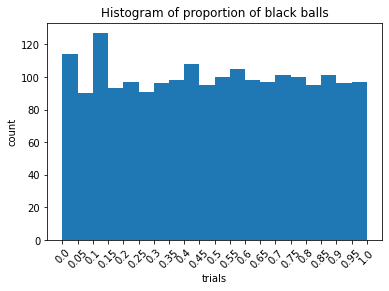

In [5]:
plt.hist(trials, bin_edges)

plt.xlabel("trials")
plt.ylabel("count")

plt.title("Histogram of proportion of black balls")
plt.xticks(bin_edges, bin_edges, rotation = 45)
plt.show()

From this, we can see that the times of the fraction of black balls, Mn, is a uniform distribution.
